In [3]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gamma_values = np.arange(0.01, 1.0, 0.01)
solvers = ('policy_iteration', 'value_iteration')
module = {'policy_iteration': 'policyiteration',
          'value_iteration': 'valueiteration'}

average_solvetimes = []

for solver in solvers:

    benchmarks = []

    for gamma in gamma_values:

        statement = '{}.{}(test_mdp, {})'.format(module[solver], solver, gamma)

        setup = """
import AldousBroder
import %s
test_maze = AldousBroder.AldousBroder(w=10, h=10).generate()
test_mdp = AldousBroder.maze_to_mdp(test_maze)
        """ % (module[solver])

        solve_times = []

        for _ in range(0, 25):
            solve_times.append(timeit.timeit(statement, setup=setup, number=1))

        benchmarks.append(solve_times)

    average_solvetimes.append([np.mean(times) for times in benchmarks])

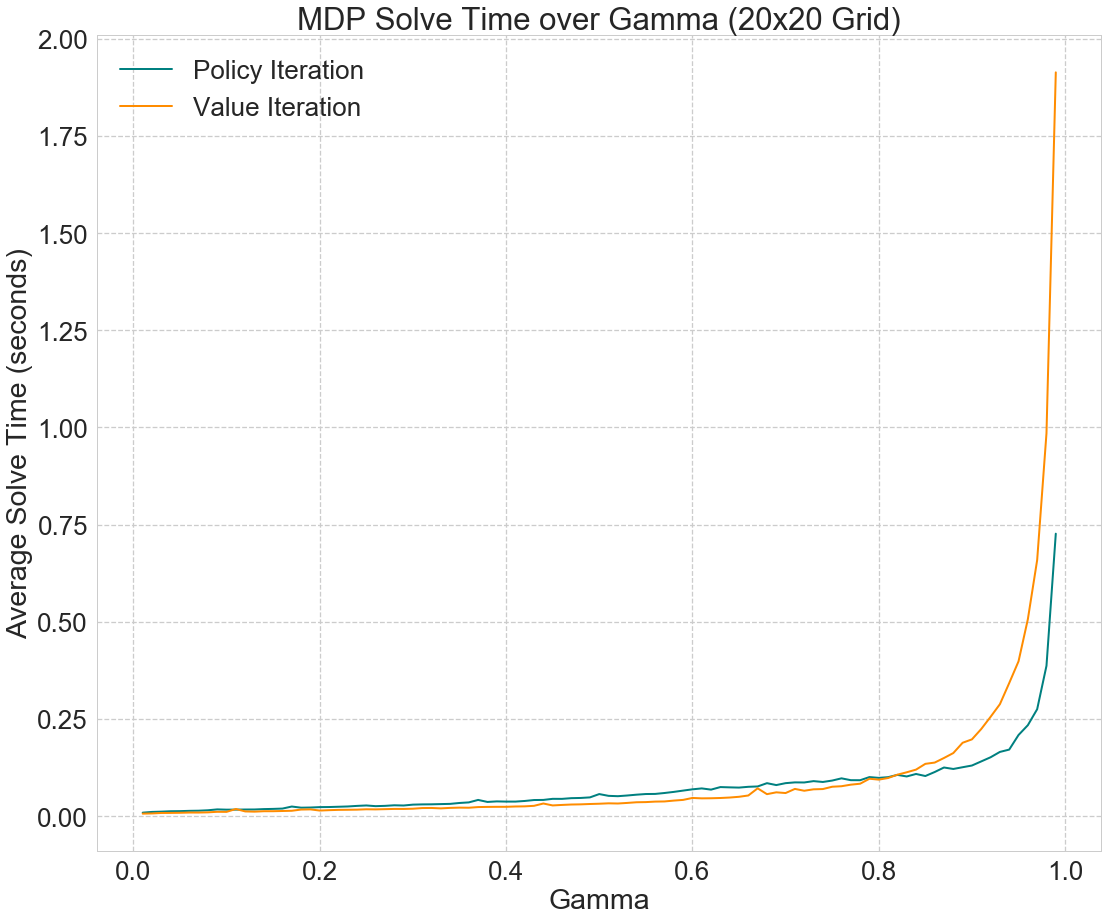

In [11]:
# plotting

sns.set('talk', 'whitegrid', 'dark', font_scale=2, font='Arial',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

plt.figure(figsize = [18,15])

plt.plot(gamma_values, average_solvetimes[0], c='teal', label='Policy Iteration')
plt.plot(gamma_values, average_solvetimes[1], c='darkorange', label='Value Iteration')


plt.xlabel("Gamma")
plt.ylabel('Average Solve Time (seconds)')
plt.title("MDP Solve Time over Gamma (20x20 Grid)")
plt.legend(loc="upper left")
plt.show()